For these codes I would like to cite the help from the repository from ScarsProject Repository of Dr. Chioquetta : https://github.com/A-Chioquetta/ScarsProject/blob/main/TimeEvol_PXP.py. The main things are used from her code with minor corrections from my side. 

In [3]:
import sys
import os
from numpy import column_stack, savetxt
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import timeit
start = timeit.default_timer()

In [14]:
# Generating the operators for the chain
def generate_operators(N):
    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    p = (si - sz) / 2.0

    sx_list = []
    sy_list = []
    sz_list = []
    p_list = []

    for n in range(N):
        op_list = [si] * N

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

        op_list[n] = p
        p_list.append(tensor(op_list))

    return sx_list, sy_list, sz_list, p_list

sx_list, sy_list, sz_list, p_list = generate_operators(N)

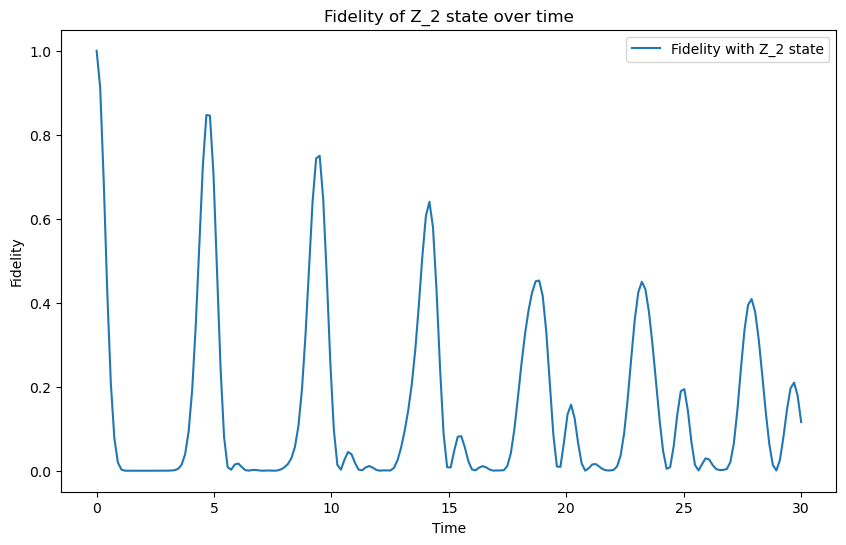

In [18]:
# Hamiltonian PXP

# Parameters
N = 8 # Number of sites
W = 0.1
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)


H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
# PXP Hamiltonian with perturbation i.e. random zeeman like field in all directions
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3

# Define the Z_2 state |010101...01>
Z2_state = tensor([basis(2, i % 2) for i in range(N)]).unit()

# Time evolution parameters
tlist = np.linspace(0, 30, 200)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, Z2_state, tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(Z2_state.overlap(state))**2 for state in result.states]

# Plot the fidelity
plt.figure(figsize=(10, 6))
plt.plot(tlist, fidelities, label='Fidelity with Z_2 state')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity of Z_2 state over time')
plt.legend()
plt.show()

Generalising this code for all length of chains with PBC

In [42]:
# Parameters
N = 14 # Number of sites, can be modified as needed
W = 0.3
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)

# Generating the operators for the chain
sx_list, sy_list, sz_list, p_list = generate_operators(N)

# Hamiltonian PXP
H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3

# Define the Z_2 state |010101...01>
Z2_state = tensor([basis(2, i % 2) for i in range(N)]).unit()

# Time evolution parameters
tlist = np.linspace(0, 40, 500)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, Z2_state, tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(Z2_state.overlap(state))**2 for state in result.states]

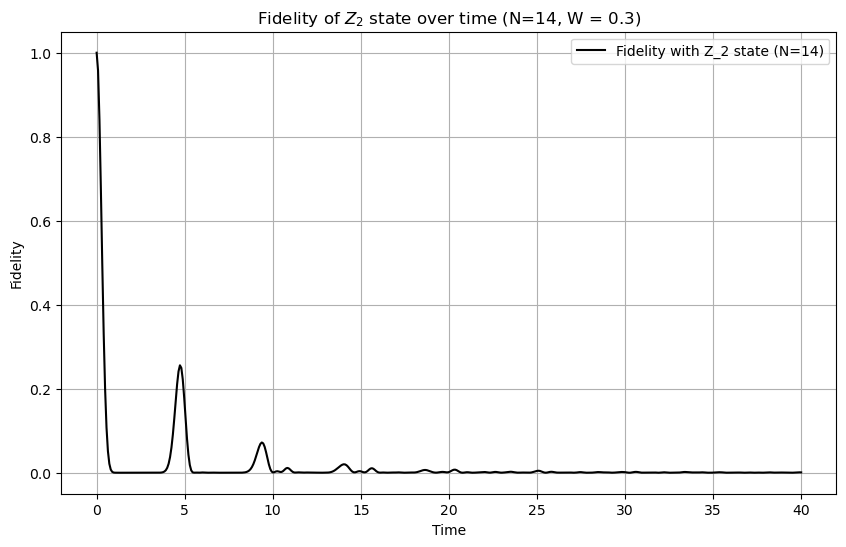

In [43]:
# Plot the fidelity
plt.figure(figsize=(10, 6))
plt.plot(tlist, fidelities, label=f'Fidelity with Z_2 state (N={N})',color='black')
plt.xlabel('Time')
plt.ylabel(r'Fidelity')
plt.title(f'Fidelity of $Z_2$ state over time (N={N}, W = {W})')
plt.legend()
plt.grid(True)
plt.show()

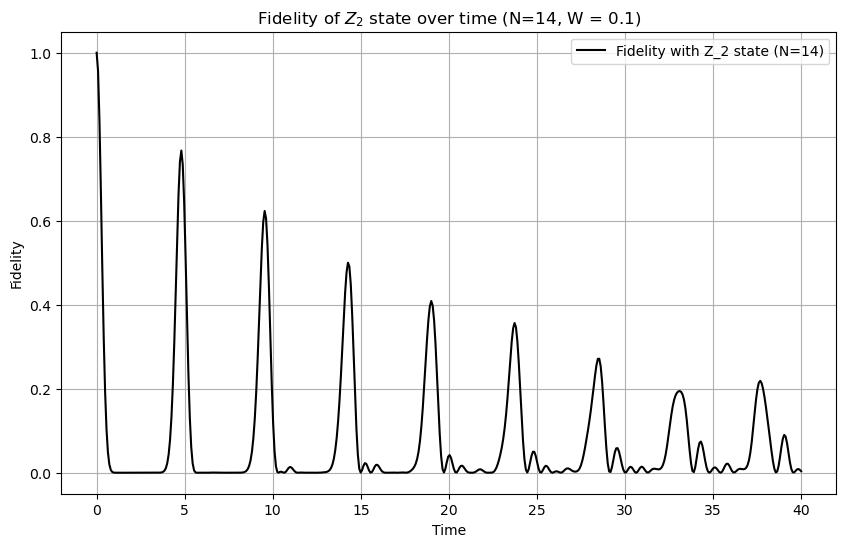

In [41]:
# Plot the fidelity
plt.figure(figsize=(10, 6))
plt.plot(tlist, fidelities, label=f'Fidelity with Z_2 state (N={N})',color='black')
plt.xlabel('Time')
plt.ylabel(r'Fidelity')
plt.title(f'Fidelity of $Z_2$ state over time (N={N}, W = {W})')
plt.legend()
plt.grid(True)
plt.show()

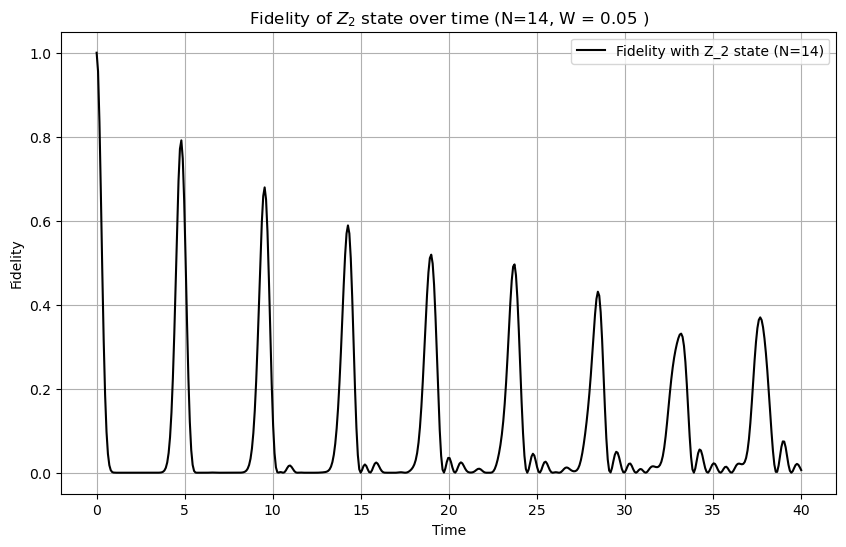

In [39]:
# Plot the fidelity
plt.figure(figsize=(10, 6))
plt.plot(tlist, fidelities, label=f'Fidelity with Z_2 state (N={N})',color='black')
plt.xlabel('Time')
plt.ylabel(r'Fidelity')
plt.title(f'Fidelity of $Z_2$ state over time (N={N}, W = {W})')
plt.legend()
plt.grid(True)
plt.show()

Results for all with OBC

In [51]:
# Parameters
N = 16 # Number of sites, can be modified as needed
W = 0.0
Bound = 'PBC'  # Boundary conditions (can be PBC or OBC)

# Generating the operators for the chain
sx_list, sy_list, sz_list, p_list = generate_operators(N)

# Hamiltonian PXP
H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3

# Define the Z_2 state |010101...01>
Z2_state = tensor([basis(2, i % 2) for i in range(N)]).unit()

# Time evolution parameters
tlist = np.linspace(0, 40, 500)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, Z2_state, tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(Z2_state.overlap(state))**2 for state in result.states]

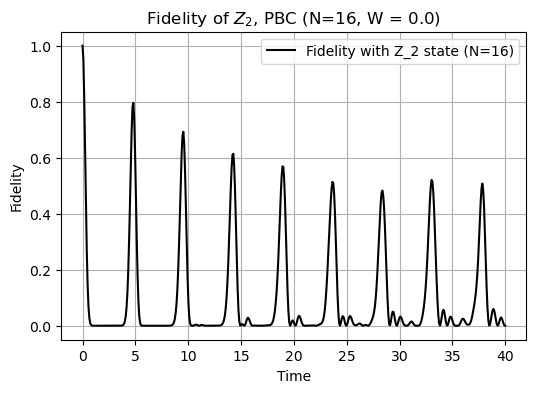

In [52]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label=f'Fidelity with Z_2 state (N={N})',color='black')
plt.xlabel('Time')
plt.ylabel(r'Fidelity')
plt.title(f'Fidelity of $Z_2$, PBC (N={N}, W = {W})')
plt.legend()
plt.grid(True)
plt.show()

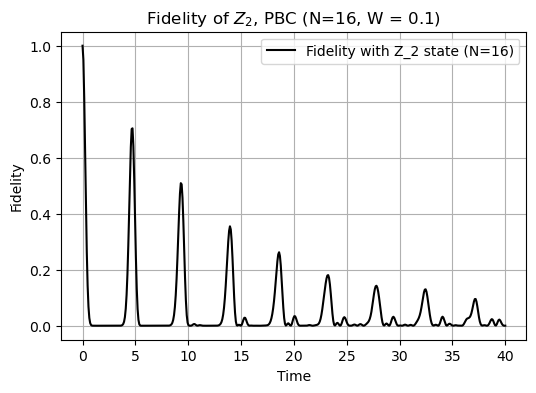

In [49]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label=f'Fidelity with Z_2 state (N={N})',color='black')
plt.xlabel('Time')
plt.ylabel(r'Fidelity')
plt.title(f'Fidelity of $Z_2$, PBC (N={N}, W = {W})')
plt.legend()
plt.grid(True)
plt.show()

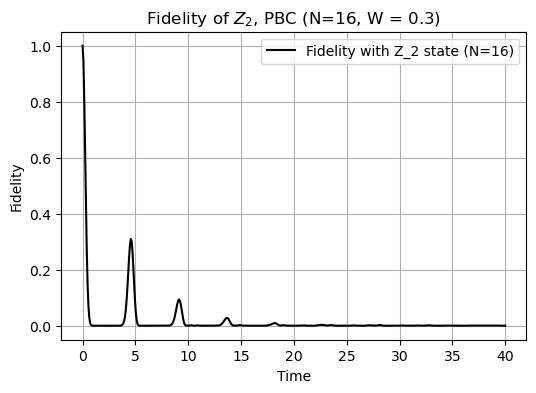

In [47]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label=f'Fidelity with Z_2 state (N={N})',color='black')
plt.xlabel('Time')
plt.ylabel(r'Fidelity')
plt.title(f'Fidelity of $Z_2$, PBC (N={N}, W = {W})')
plt.legend()
plt.grid(True)
plt.show()

L = 18, OBC

In [55]:
# Parameters
N = 18 # Number of sites, can be modified as needed
W = 0.0
Bound = 'OBC'  # Boundary conditions (can be PBC or OBC)

# Generating the operators for the chain
sx_list, sy_list, sz_list, p_list = generate_operators(N)

# Hamiltonian PXP
H = 0
for n in range(N - 2):
    H += p_list[n] * sx_list[n + 1] * p_list[n + 2]

# Boundary conditions
if Bound == 'pbc' or Bound == 'PBC':
    H += p_list[N - 2] * sx_list[N - 1] * p_list[0] + p_list[N - 1] * sx_list[0] * p_list[1]  # PBC

if Bound == 'obc' or Bound == 'OBC':
    H += sx_list[0] * p_list[1] + p_list[N - 2] * sx_list[N - 1]  # OBC

# Random uniform distribution of perturbation strength values
hw = np.random.uniform(-W / 2, W / 2, (3 * N))
m = 0
for n in range(N):
    H += hw[m] * sx_list[n] + hw[m + 1] * sy_list[n] + hw[m + 2] * sz_list[n]  # Perturbing all directions
    m += 3

# Define the Z_2 state |010101...01>
Z2_state = tensor([basis(2, i % 2) for i in range(N)]).unit()

# Time evolution parameters
tlist = np.linspace(0, 40, 500)  # Time array, modify as needed

# Evolve the system
result = mesolve(H, Z2_state, tlist, [])

# Calculate fidelity with the initial Z2 state
fidelities = [np.abs(Z2_state.overlap(state))**2 for state in result.states]

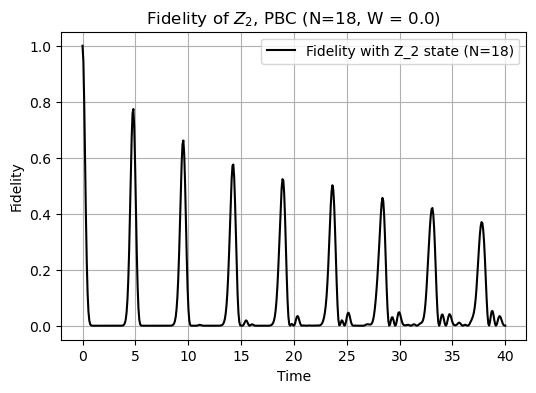

In [54]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label=f'Fidelity with Z_2 state (N={N})',color='black')
plt.xlabel('Time')
plt.ylabel(r'Fidelity')
plt.title(f'Fidelity of $Z_2$, PBC (N={N}, W = {W})')
plt.legend()
plt.grid(True)
plt.show()

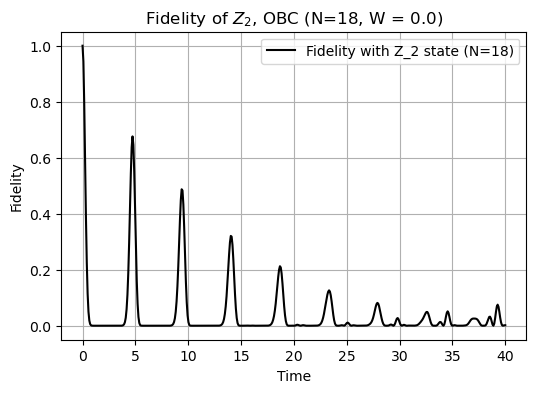

In [56]:
# Plot the fidelity
plt.figure(figsize=(6, 4))
plt.plot(tlist, fidelities, label=f'Fidelity with Z_2 state (N={N})',color='black')
plt.xlabel('Time')
plt.ylabel(r'Fidelity')
plt.title(f'Fidelity of $Z_2$, OBC (N={N}, W = {W})')
plt.legend()
plt.grid(True)
plt.show()